# Data Analysis Project - Spring 2023

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [1]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.


### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

## Question 1


**Question**: What is the relationship between coverage and claims?



**Answer**: It is proved from the analysis that the premium coverage has the less claim amount and the less total claims. The analysis proof shows that the premium customer claims the coverage less comparitively with the basic and extended claim customers. The company is making profit from the premium customers claim making it the less price.


## Supporting Analysis

In [3]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [4]:
claims_df %>% group_by(coverage, total_claims) %>% summarise(avg_claims = mean(total_claims_amount))

`summarise()` has grouped output by 'coverage'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


coverage,total_claims,avg_claims
<fct>,<dbl>,<dbl>
Basic,1,1598.881
Basic,2,2454.568
Basic,3,3237.310
Basic,4,4125.387
Extended,1,1629.197
Extended,2,2398.879
Extended,3,3225.572
Premium,1,1524.182
Premium,2,2383.111


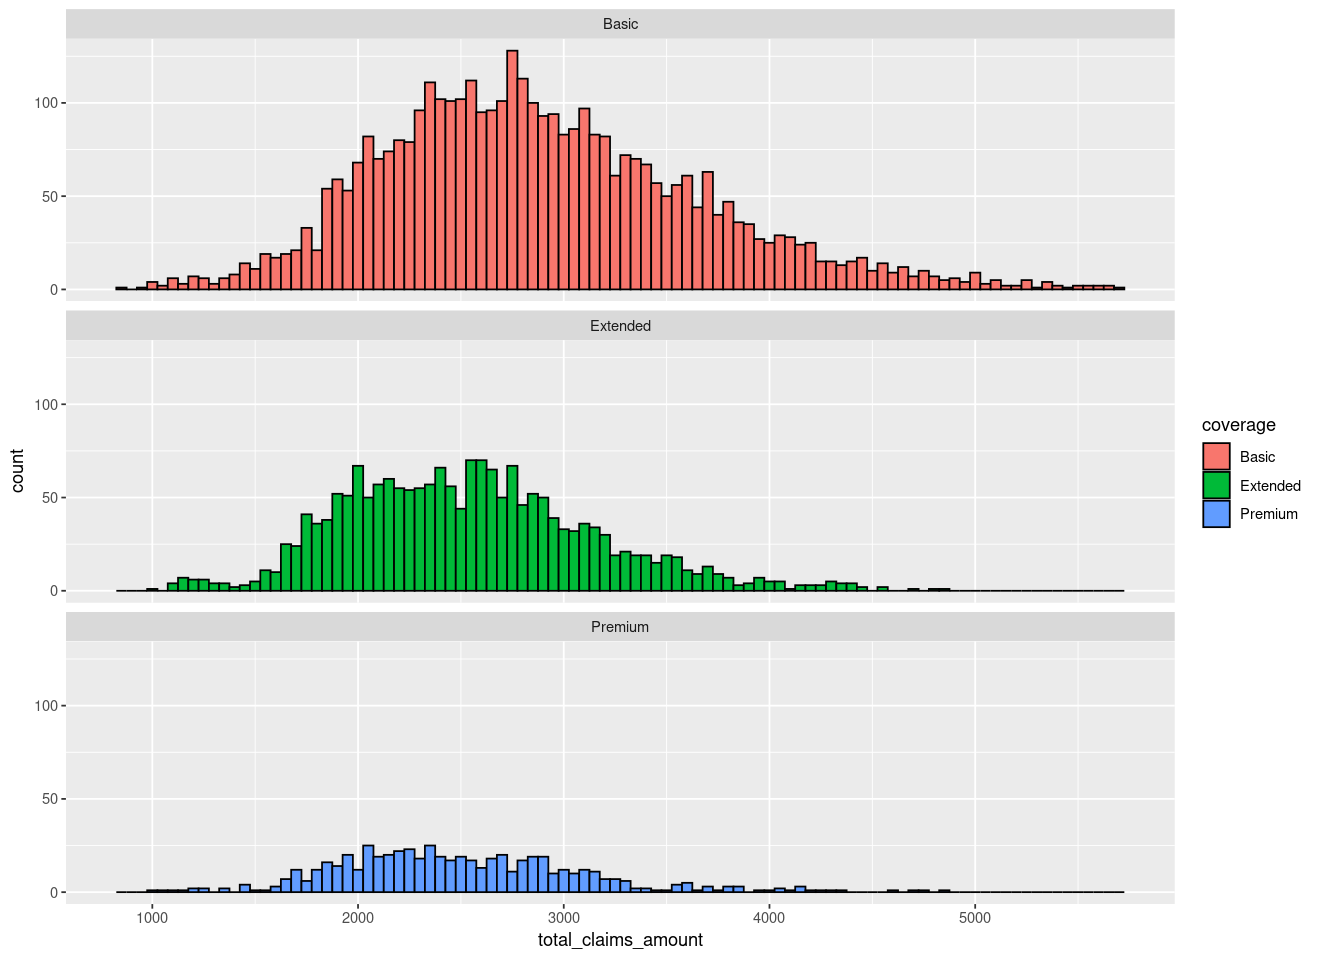

In [5]:
ggplot(claims_df, aes( x = total_claims_amount, fill = coverage)) + geom_histogram(color = "black",binwidth = 50) +
facet_wrap(~coverage, nrow = 4)

## Question 2


**Question**:How long does the customers with different coverage active?



**Answer**: According to the analysis, it is proved that basic coverage customers is active for a longer period when compared with the other two coverages. There is a another thesis that the premium car customers changes the car often, so the policy may be changes. But when checking the mean value of the coverage months, premium package wins the race with the highest value.


## Supporting Analysis


In [6]:
policy_months = claims_df %>% group_by(coverage)%>% summarise(mean_value = mean(months_policy_active), 
                                                              active_months = sum(months_policy_active))
policy_months

coverage,mean_value,active_months
<fct>,<dbl>,<dbl>
Basic,38.91691,148468
Extended,39.12756,72699
Premium,39.44965,22723


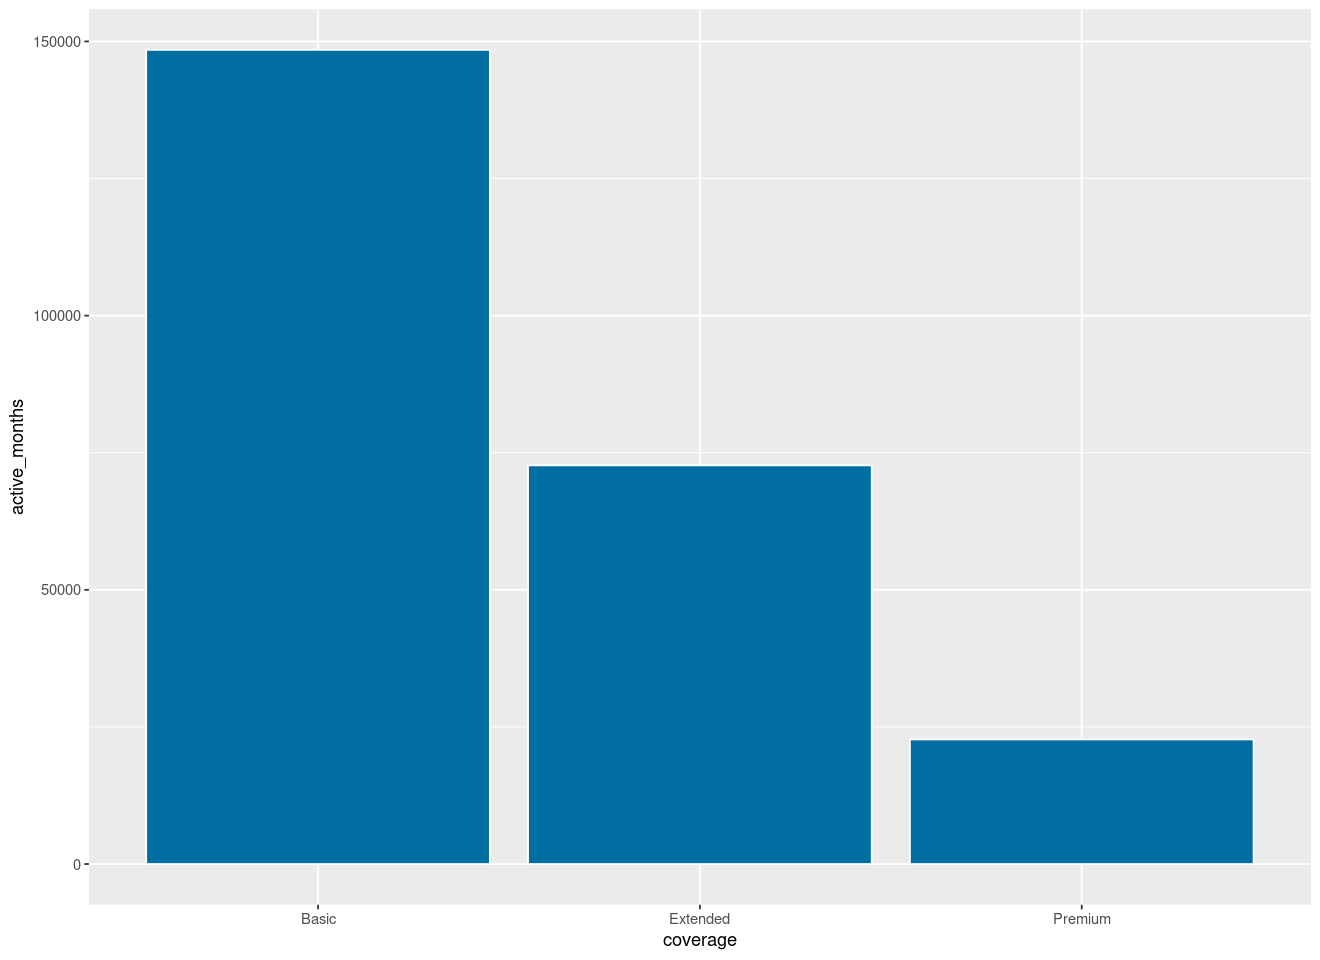

In [7]:
ggplot(policy_months, aes(x = coverage, y =  active_months)) + geom_col(color = "white", fill = "#006EA1")

## Question 3


**Question**:How the lifetime value of the customer is predicited by the company?



**Answer**:The area wise analysis shows the life time of the policey according to the customers data. By the analysis of the record, the life time of the policy grouping by coverage can be predicted area wise.Suburban area has the highest lifetime value with the extended coverage.


## Supporting Analysis


In [8]:
claims_df %>% group_by(coverage,residence_type) %>% summarise(avg_lifetimevalue = mean(customer_lifetime_value),
                                                             number_of_customers = sum(customer_lifetime_value))

`summarise()` has grouped output by 'coverage'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


coverage,residence_type,avg_lifetimevalue,number_of_customers
<fct>,<fct>,<dbl>,<dbl>
Basic,Urban,127.0712,123132
Basic,Suburban,379.5041,823524
Basic,Rural,439.9098,297379
Extended,Urban,1149.1350,502172
Extended,Suburban,1684.6600,1853126
Extended,Rural,1570.4081,504101
Premium,Urban,2432.0674,216454
Premium,Suburban,3058.3282,1183573
Premium,Rural,2585.1400,258514


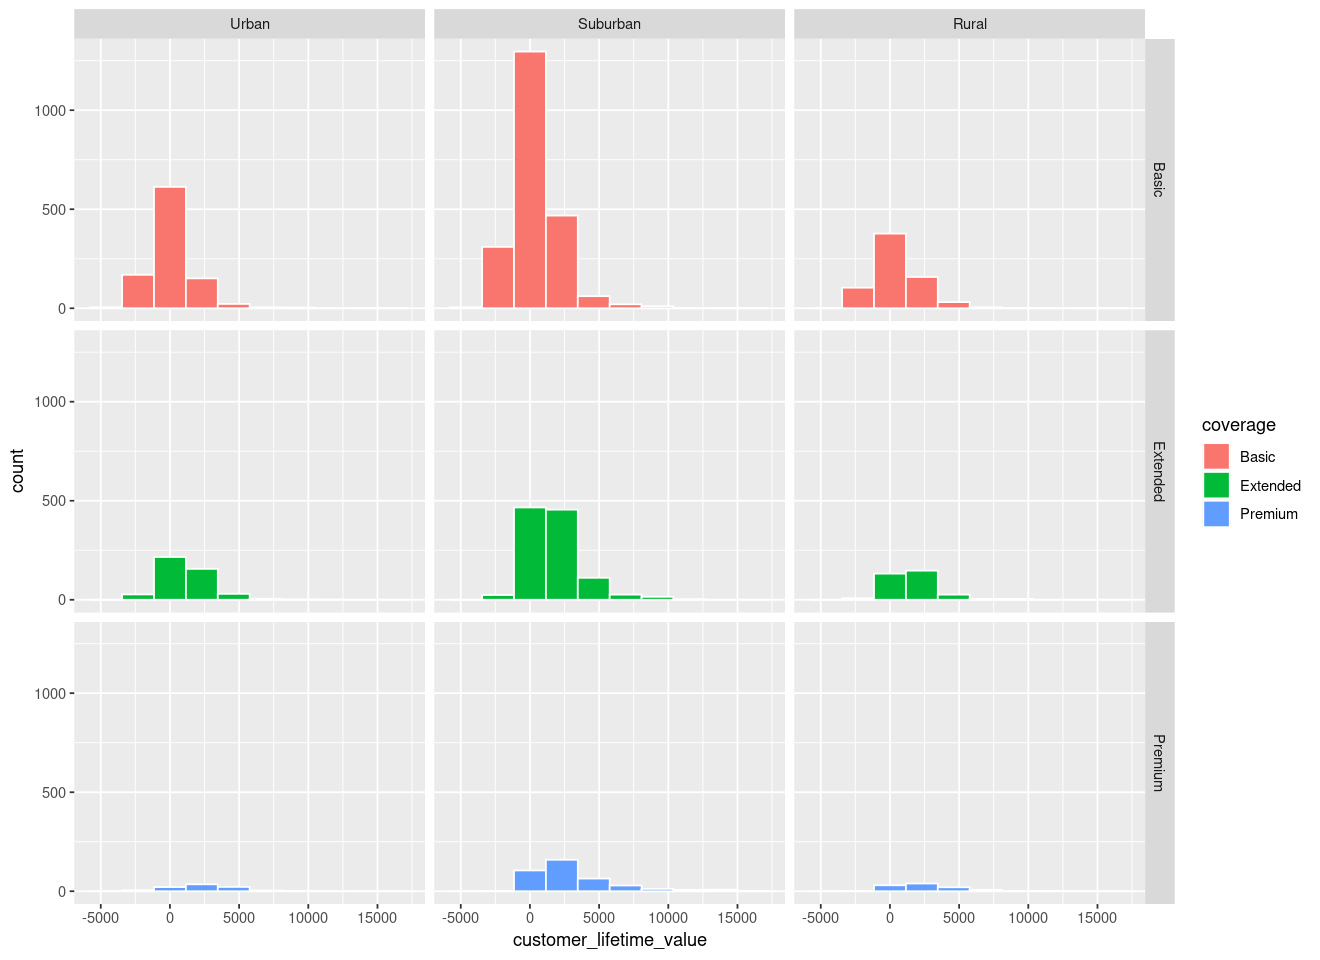

In [9]:
ggplot(claims_df, aes(x = customer_lifetime_value, fill = coverage)) + geom_histogram( color = "white",bins = 10) + facet_grid(coverage~  residence_type)

## Question 4


**Question**:Is the premium policy coverage depends upon on the gender?



**Answer**:Yes, the premium policy coverage is depends upon the gender. Accoding to the analysis, female  has the highest value of coverage than male.


## Supporting Analysis


In [10]:
gender_coverage = claims_df %>% group_by(gender, coverage) %>% summarise(avg_premium = mean(monthly_premium))
gender_coverage

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


gender,coverage,avg_premium
<fct>,<fct>,<dbl>
Female,Basic,82.17439
Female,Extended,104.85934
Female,Premium,137.06885
Male,Basic,82.87011
Male,Extended,103.83597
Male,Premium,131.53506


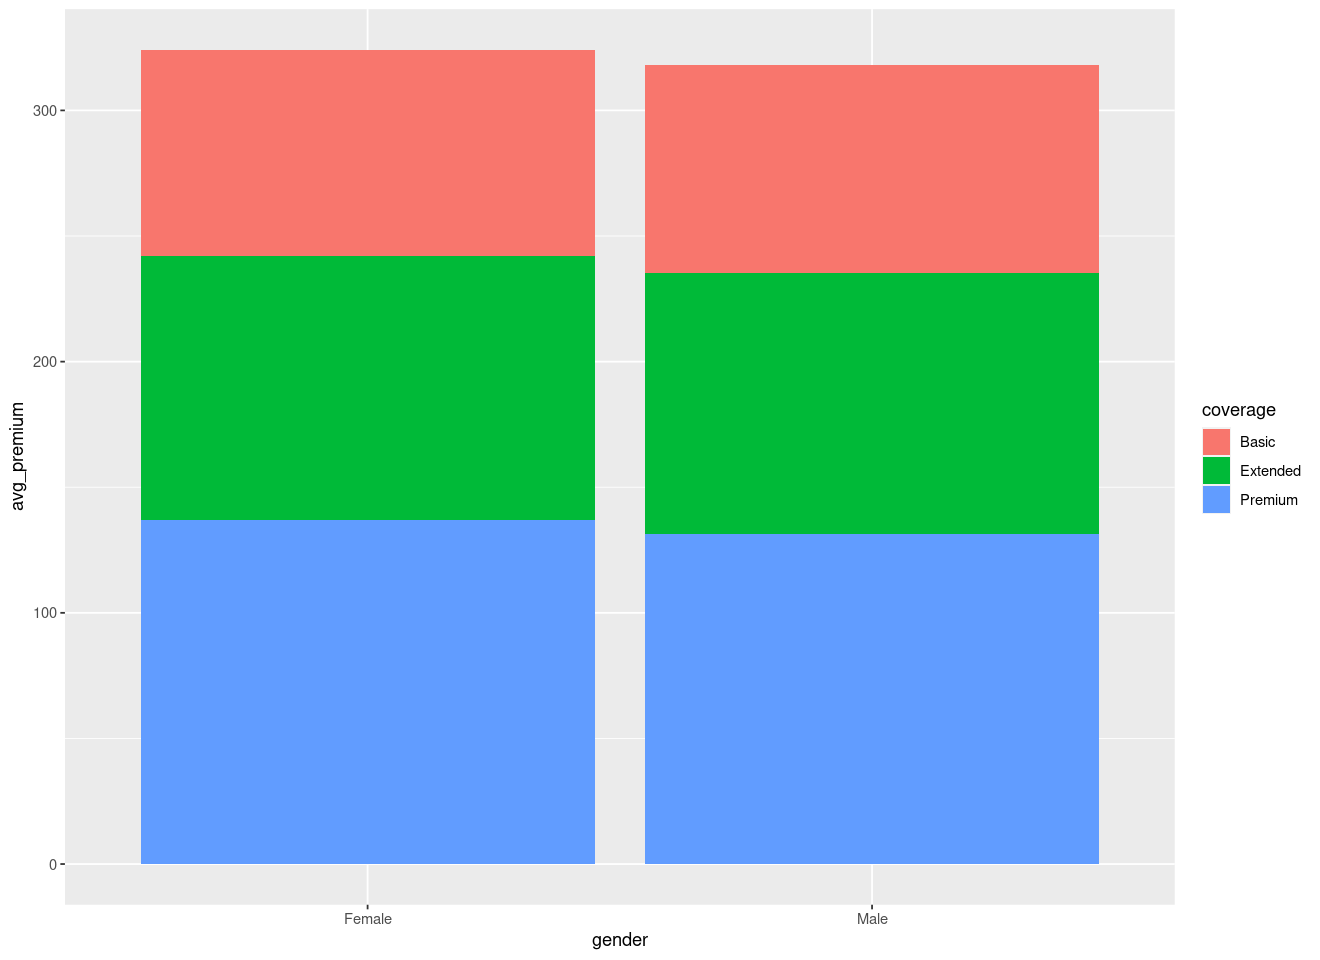

In [11]:
ggplot(gender_coverage, aes(x = gender, y = avg_premium, fill = coverage)) + geom_col()

## Question 5


**Question**:Does the claims affected by the marital status of the customers?



**Answer**:According to the analysis, it is proved that the most number of claims are done by married, the population of married is larger than the single status people. Most often the car will be purschased by the married person.



## Supporting Analysis


In [12]:
claim_gender = claims_df %>% group_by(marital_status, gender)%>% summarise(claims = sum(total_claims))
claim_gender

`summarise()` has grouped output by 'marital_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


marital_status,gender,claims
<fct>,<fct>,<dbl>
Single,Female,1124
Single,Male,1305
Married,Female,5142
Married,Male,4825
Divorced,Female,1293
Divorced,Male,1257


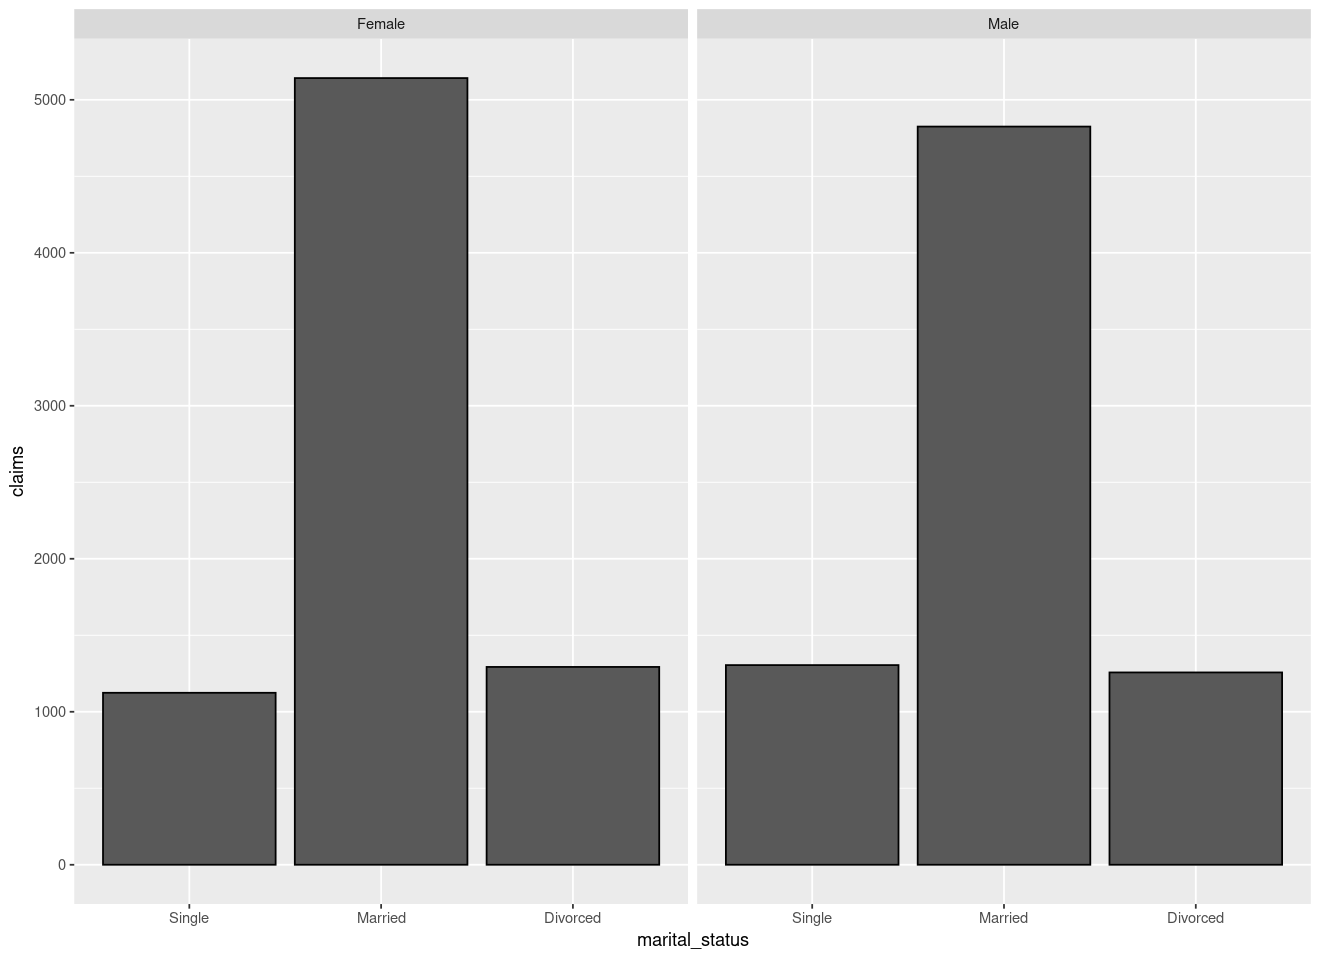

In [13]:
ggplot(claim_gender, aes(x = marital_status, y = claims)) + geom_col(color = "black") + facet_wrap(~gender, nrow = 1)

## Question 6


**Question**: How monthly premium plan related with vehicle class?



**Answer**:The premium plan is related with the vehicle class in the way of luxury premium car and suv customers pay more for premium plan than the other vehicle customers.


## Supporting Analysis


In [14]:
premium_with_vehicle = claims_df %>% group_by(vehicle_class) %>% summarise(avg_premium = mean(monthly_premium))
premium_with_vehicle

vehicle_class,avg_premium
<fct>,<dbl>
Two-Door Car,77.15248
Four-Door Car,77.50832
Sports Car,122.53134
SUV,119.62761
Luxury Car,212.68067
Luxury SUV,217.85714


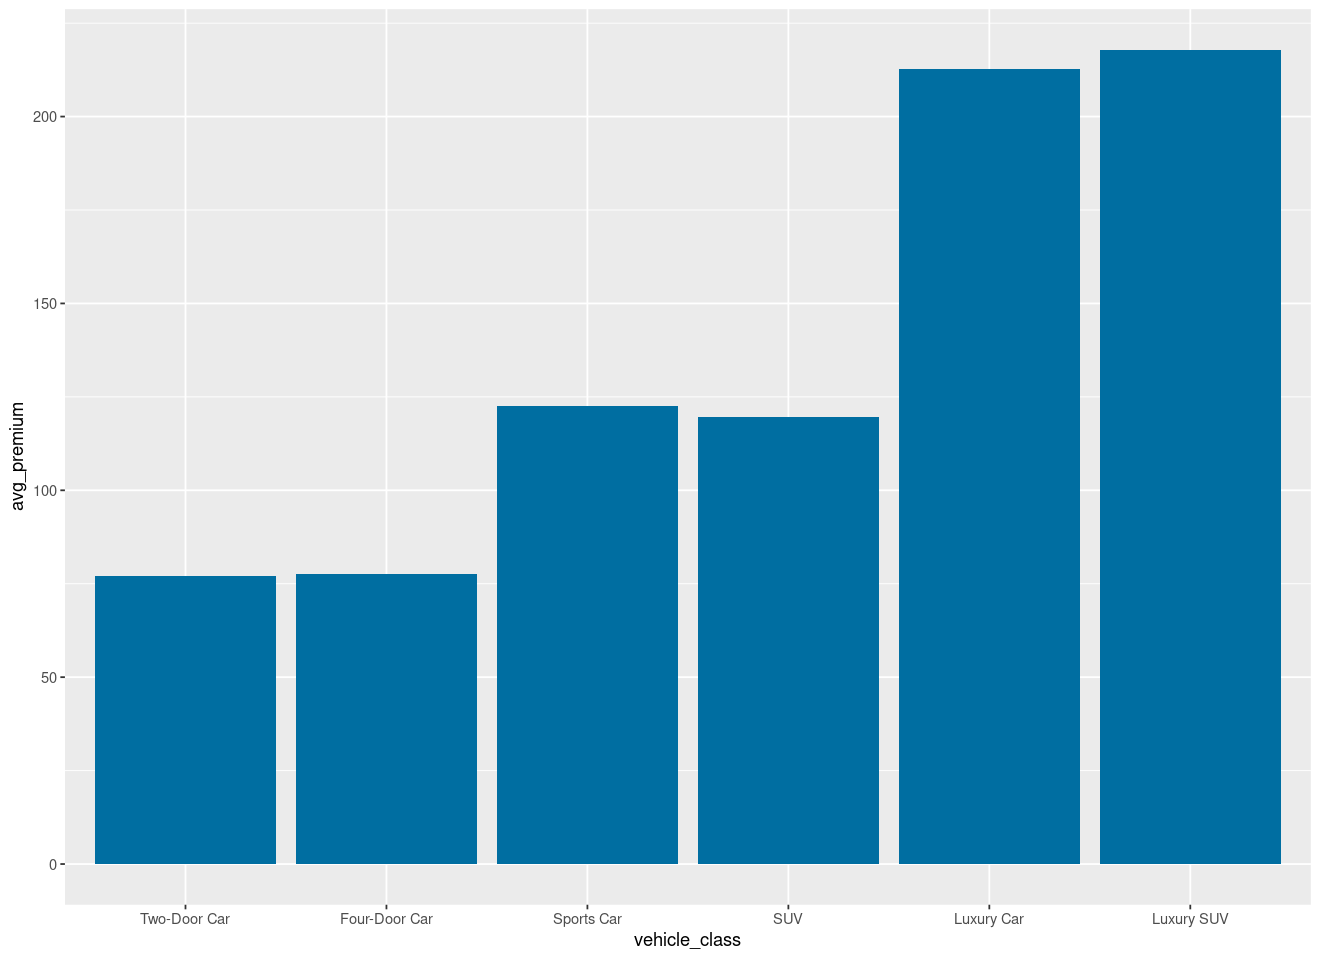

In [15]:
ggplot(premium_with_vehicle, aes(x = vehicle_class, y = avg_premium)) + geom_bar(stat = "identity", fill = "#006EA1")

## Question 7


**Question**:How the premium plan related with vehicle size?



**Answer**:The income from the premium plan of the mid size vehicle is 4 - 8 times greater than the other size vehicle. So the vehicle size is the most important factor to get related with the premium plan.


## Supporting Analysis


In [16]:
premium_with_vehiclesize = claims_df %>% group_by(vehicle_size) %>% summarise(avg_premium = mean(monthly_premium), sum_income = sum(monthly_premium))
premium_with_vehiclesize

vehicle_size,avg_premium,sum_income
<fct>,<dbl>,<dbl>
Small,93.36910,116618
Midsize,94.10623,413691
Large,92.54305,55896


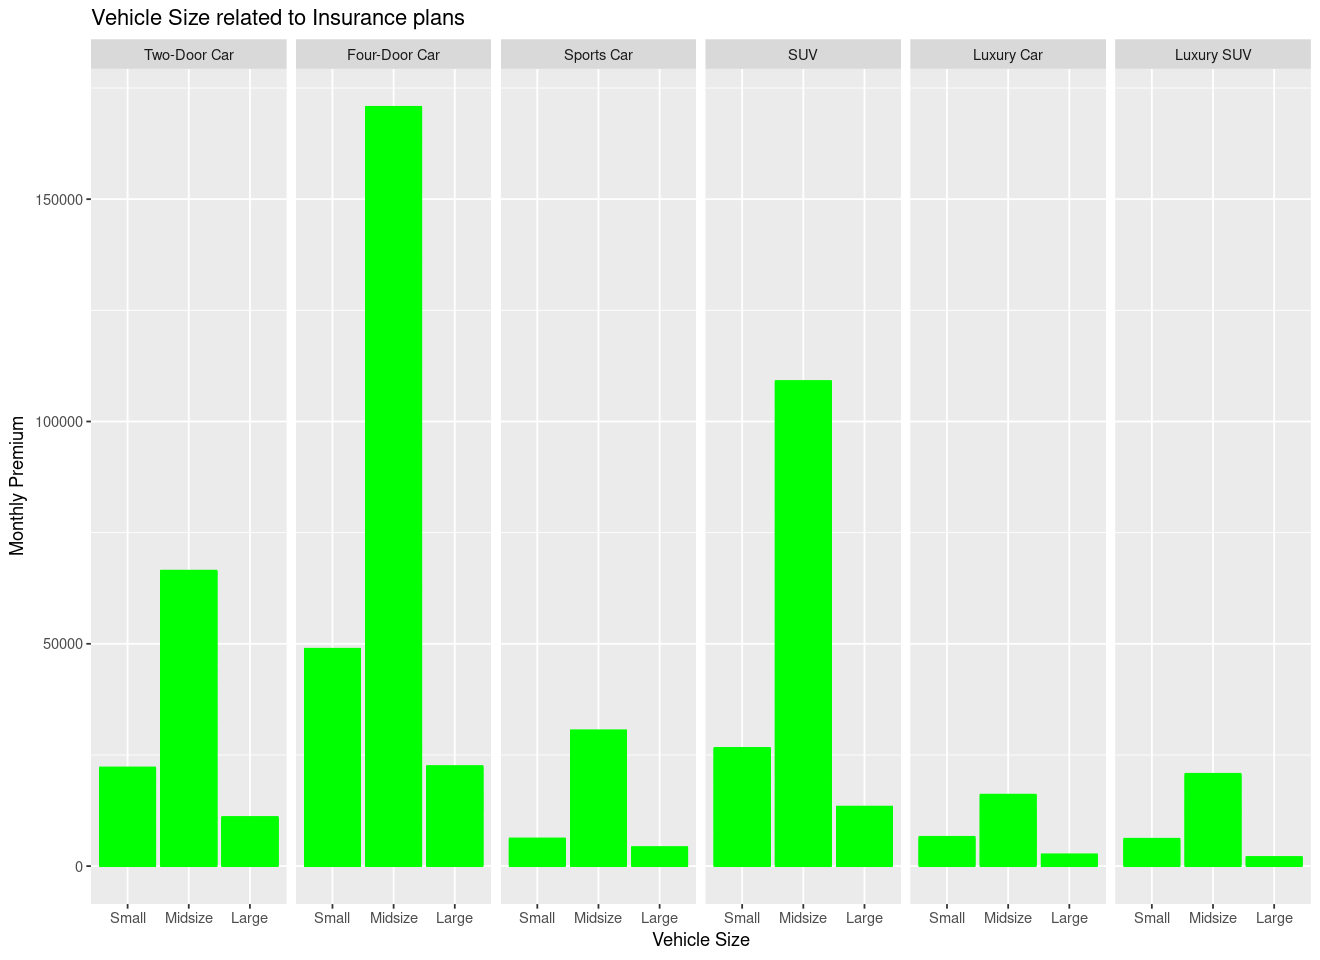

In [17]:
ggplot(claims_df, aes(x = vehicle_size, y = monthly_premium)) + geom_bar(stat = "identity", color = "green") + facet_grid(~vehicle_class) + labs(title = "Vehicle Size related to Insurance plans", x = "Vehicle Size", y = "Monthly Premium")

## Question 8


**Question**:What is the connection between total cliams, vehicle class?



**Answer**:The monthly premium paid by the vehicle class "Sports Car", "Luxury Car", and "Luxury SUV" is low, the business of the company can be increased if these class vehicle increase the monthly premium.


## Supporting Analysis


In [18]:
claims_df %>% group_by(vehicle_class)%>% filter(coverage == "Extended")%>% count(name = "Numberof_claims", sort = TRUE)%>% arrange( Numberof_claims)

New names:
• `` -> `...1`


vehicle_class,Numberof_claims
<fct>,<int>
Luxury Car,36
Luxury SUV,56
Sports Car,97
SUV,342
Two-Door Car,371
Four-Door Car,956


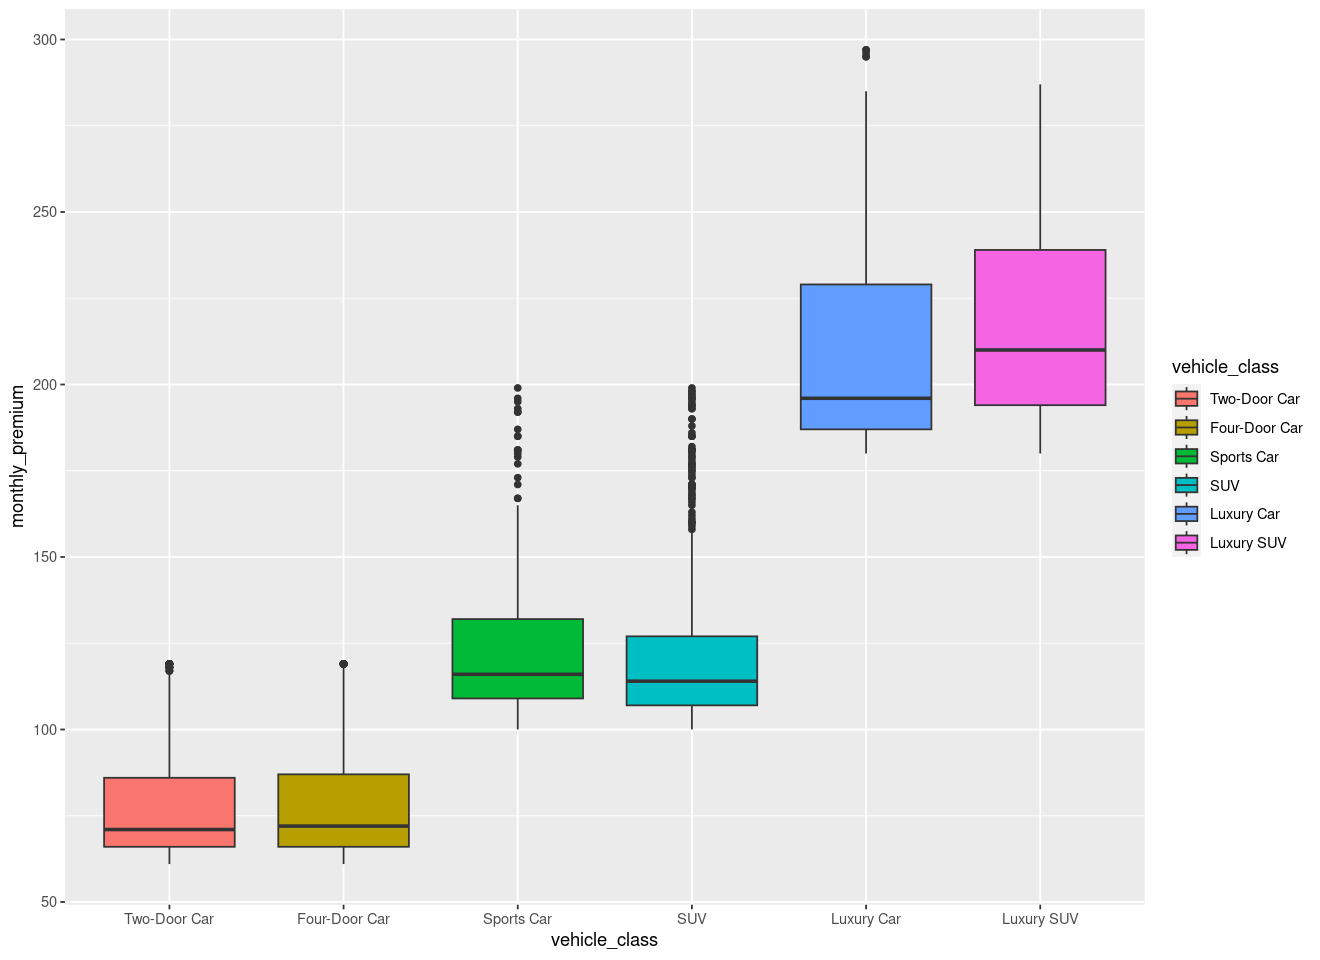

In [19]:
ggplot(claims_df, aes(x = vehicle_class, y = monthly_premium, fill = vehicle_class))+ geom_boxplot()

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

The dataset is about the customer details and customer insurance claim details from a car insurance company for their vehicle. The dataset consists of 6249 records and 21 variables. The data in the dataset includes customer name, gender, marital status, vehicle class, vehicle size, number of claims, monthly plans, etc. The major problem for the company is due to the large amount of basic claim for the less amount, the company is facing a major no profit situation, to overcome this situtation the analysis is made to find the factors and solutions. The goal of the company according to the analysis factor is development of company with the huge margin in the profit with a fair insurance amount.


## Key Findings

The interesting finding from our business is the relationship between the variables, and the connection between the vehicle and claim amount. These findings are interesting because the company situation is in the margin because of the high claim of basic insurance coverage with less amount and the less amount for the premium insurance. My recommendation in the upcoming section is the report of result of this analysis for what the company should improve in their business ideas.

## Recommendations

First recommendation is to increase the amount of claim for the premium car especially vehicle class of "Luxury SUV","Luxury Car", and "Sports Car". Thisrecommendation will definitely give the company a good results because according to the analysis, the basic and extended coverage has the highest number of claim and the price of these two coverage for the remaining vehicle classes are low, but the premium coverage has the lowest number of claim with less claim. The company can achieve a good profit if the company manages to promote the premium coverage to many number of luxury SUV and cars since the claim amount is also moderate when compare with the other vehicle classes. 

Second recommendation is to have ready made analysis report in the company to analyze the report when a customers is approaching for a insurance. The report will says about the areawise insurance claim report of the customer. With the help of the report the insurance can be manages to sell accordingly depends of the coverage.